# Starter Code

In [1]:
import numpy as np
import pandas as pd
from joblib import dump, load
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [2]:
df_2018 = pd.read_csv('../data/2018.csv')
df_2017 = pd.read_csv('../data/2017.csv')
df_2016 = pd.read_csv('../data/2016.csv')

def get_classifier_convert(df):
    conditions = [
        (df['fourth_down_converted'] == 1.0),
        (df['fourth_down_failed'] == 1.0),
        (df['field_goal_attempt'] == 1.0),
        (df['punt_attempt'] == 1.0)
    ]

    results = ['CONVERTED', 'FAILED', 'FIELD_GOAL', 'PUNT']

    y = np.select(conditions, results)
    return y

def get_classifier_attempt(df):
    conditions = [
        (df['fourth_down_converted'] == 1.0) | (df['fourth_down_failed'] == 1.0),
        (df['field_goal_attempt'] == 1.0),
        (df['punt_attempt'] == 1.0)
    ]

    results = ['ATTEMPTED', 'FIELD_GOAL', 'PUNT']

    y = np.select(conditions, results)
    return y

def ready_data_convert(df):
    df = df.dropna()
    y = get_classifier_convert(df)
    df = df.drop(columns=['posteam', 'fourth_down_converted', 'fourth_down_failed', 'field_goal_attempt', 'punt_attempt', 'game_date', 'down'])
    return df, y

def ready_data_attempt(df):
    df = df.dropna()
    y = get_classifier_attempt(df)
    df = df.drop(columns=['posteam', 'fourth_down_converted', 'fourth_down_failed', 'field_goal_attempt', 'punt_attempt', 'game_date', 'down'])
    return df, y

x, y = ready_data_attempt(pd.concat([df_2016, df_2017, df_2018]))
X_train, X_test, y_train_a, y_test_a = train_test_split(x, y, test_size=0.2, random_state=10)

x, y = ready_data_convert(pd.concat([df_2016, df_2017, df_2018]))
X_train, X_test, y_train_c, y_test_c = train_test_split(x, y, test_size=0.2, random_state=10)

# Analysis

In [3]:
clf_convert = load('../models/random_forest/convert.joblib')
clf_convert_cv = load('../models/random_forest/convert_cv.joblib')
clf_attempt = load('../models/random_forest/attempt.joblib')
clf_attempt_cv = load('../models/random_forest/attempt_cv.joblib')

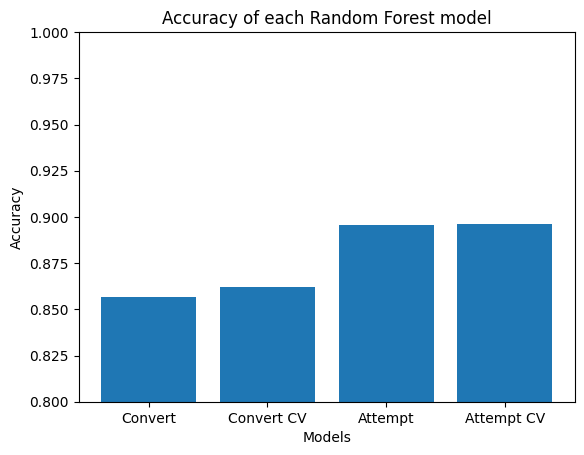

In [4]:
scores = [clf_convert.score(X_test, y_test_c),
          clf_convert_cv.score(X_test, y_test_c),
          clf_attempt.score(X_test, y_test_a),
          clf_attempt_cv.score(X_test, y_test_a)]

labels = ['Convert', 'Convert CV', 'Attempt', 'Attempt CV']

plt.bar(labels, scores)
plt.title('Accuracy of each Random Forest model')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1)
plt.show()

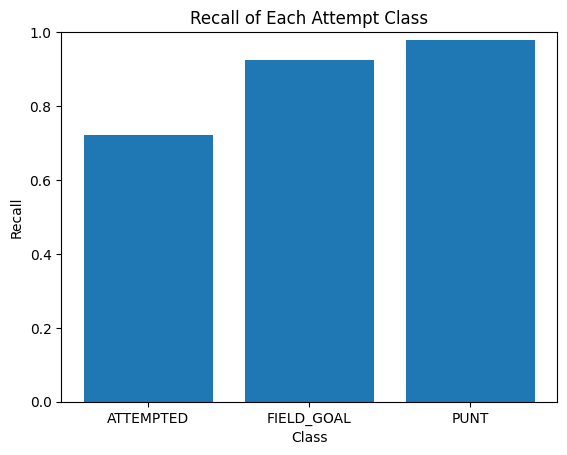

In [5]:
report = classification_report(y_test_a, clf_attempt_cv.predict(X_test), zero_division=0, output_dict=True)

scores = [report["ATTEMPTED"]["recall"],
          report["FIELD_GOAL"]["recall"],
          report["PUNT"]["recall"]]

classes = ['ATTEMPTED', 'FIELD_GOAL', 'PUNT']

plt.bar(classes, scores)
plt.title('Recall of Each Attempt Class')
plt.xlabel('Class')
plt.ylabel('Recall')
plt.ylim(0, 1)
plt.show()

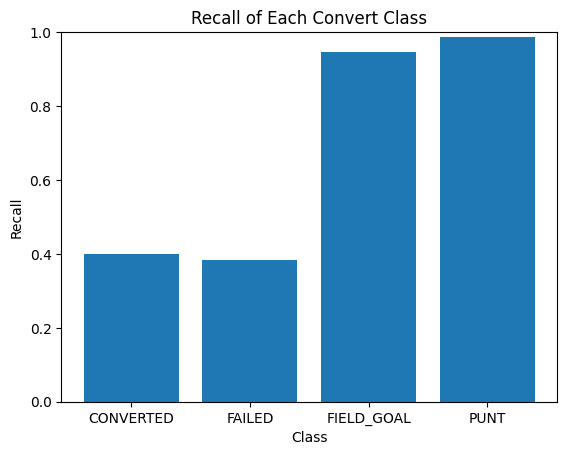

In [6]:
report = classification_report(y_test_c, clf_convert_cv.predict(X_test), zero_division=0, output_dict=True)

scores = [report["CONVERTED"]["recall"],
          report["FAILED"]["recall"],
          report["FIELD_GOAL"]["recall"],
          report["PUNT"]["recall"]]

classes = ['CONVERTED', 'FAILED', 'FIELD_GOAL', 'PUNT']

plt.bar(classes, scores)
plt.title('Recall of Each Convert Class')
plt.xlabel('Class')
plt.ylabel('Recall')
plt.ylim(0, 1)
plt.show()